In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('dataset_1672182.csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate


In [5]:
qty_count = len(df[df['transaction_qty']>1])
print("Amount of orders where qty>1:", qty_count)
print("Total amount of orders:", len(df))
qty_probability = qty_count/len(df)*100
print("Propability that  orders contains more than 1 item:", qty_probability, "%")

Amount of orders where qty>1: 4371
Total amount of orders: 7356
Propability that  orders contains more than 1 item: 59.42088091353996 %


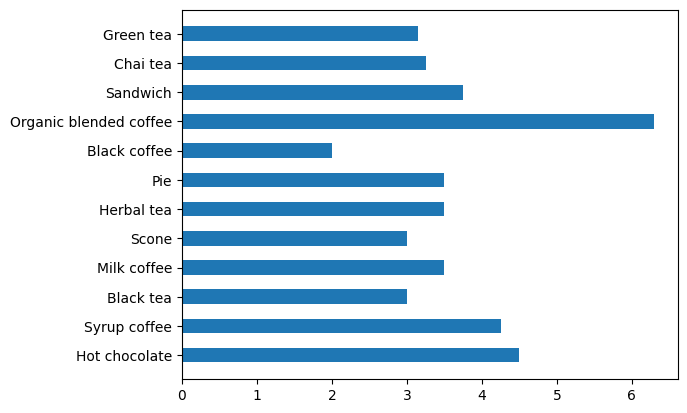

In [6]:
x = df['product_type']
y = df['unit_price']

model1 = plt.barh(x, y, height=0.5) #labels pre category toevoegen

In [7]:
mean_unit_price = np.mean(df['unit_price'])
median_unit_price = np.median(df['unit_price'])
print('Mean unit price:', mean_unit_price)
print('Median unit price:', median_unit_price)

Mean unit price: 3.8065524741707444
Median unit price: 3.5


The Mean is bigger than the Median so the unit prices are Right-skewed. This means there are reletively more cheaper products than there are expensive products

Question 3:

In [31]:
df['transaction_qty'] = pd.to_numeric(df['transaction_qty'])

df.insert(9, "revenue", df['unit_price'] * df['transaction_qty'])
df.head() #added revenue column to check what the total cash coming per transaction is

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,revenue
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate,4.5
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee,8.5
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea,3.0
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee,10.5
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate,4.5


In [61]:
print("Total amount of transactions:", len(df))
total_money_spent = (df['unit_price']*df["transaction_qty"]).sum()
print("Total amount of money spent:", total_money_spent )
print("Average revenue per transaction:", (total_money_spent/len(df)))

Total amount of transactions: 7356
Total amount of money spent: 54938.0
Average revenue per transaction: 7.468461120174007


In [32]:
unit_price_per_date = df.groupby('transaction_date')["revenue"].sum()

print("The total amount of money spent per day:")
print(unit_price_per_date)

#ik snap nog niet helemaal wat ze met de interval en likely to fall bedoelen 

#06/05 was a really bad day
#06/10 was a really good day

#zorgen voor een gemiddelde uitgegeven geld per dag
# dus ook het aantal transactie per dag te weten komen 

The total amount of money spent per day:
transaction_date
06/05/2023     2709.15
06/06/2023     6370.65
06/07/2023     6368.10
06/08/2023     8656.60
06/09/2023    10306.20
06/10/2023    11345.95
06/11/2023     9181.35
Name: revenue, dtype: float64


In [35]:
test = df.groupby(df['transaction_date']).size()

print(test) #amout of transaction per day

transaction_date
06/05/2023     365
06/06/2023     846
06/07/2023     868
06/08/2023    1130
06/09/2023    1379
06/10/2023    1496
06/11/2023    1272
dtype: int64


In [59]:
print("Average value per transaction 06/05:", 2709.15/365)
print("Average value per transaction 06/06:", 6370.65/846)
print("Average value per transaction 06/07:", 6368.10/868)
print("Average value per transaction 06/08:", 8656.60/1130)
print("Average value per transaction 06/09:", 10306.20/1379)
print("Average value per transaction 06/10:", 11345.95/1496)
print("Average value per transaction 06/11:", 9181.35/1272)

#zondag 06/11 is de slechtste dag, woensdag 06/07 is ook slecht. donderdag 06/08 is het best

Average value per transaction 06/05: 7.422328767123288
Average value per transaction 06/06: 7.53031914893617
Average value per transaction 06/07: 7.33652073732719
Average value per transaction 06/08: 7.66070796460177
Average value per transaction 06/09: 7.473676577229877
Average value per transaction 06/10: 7.584191176470589
Average value per transaction 06/11: 7.218042452830189


4: :)))))))))